# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [1]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [2]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [3]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        N = len(y)
        MSE = (1./N) * sum((X.dot(w) - y) ** 2)
        return MSE
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        N = len(y)
        grad = (2./N) * X.T.dot(X.dot(w) - y)
        return grad

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [4]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [5]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    n_features = len(w_init)
    trac = np.zeros((n_iterations, n_features))
    w_curr = w_init
    for i in range(n_iterations):
        grad_curr = loss.calc_grad(X, y, w_curr)
        w_curr = w_curr - lr * grad_curr
        trac[i] = w_curr
        
    return trac   

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [309]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [7]:
w_init

array([0.62074297, 1.79288146])

In [310]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

155.26258214351958
0.86706443956495


In [472]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

MSE: 0.8670644395654732
learning rate: 1e-05


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


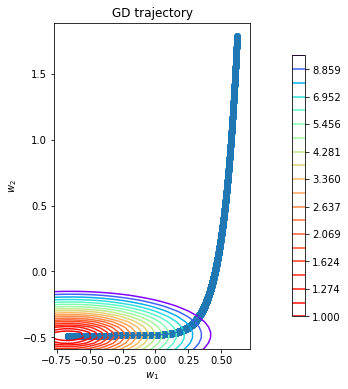

MSE: 0.8670644395649093
learning rate: 0.0001


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


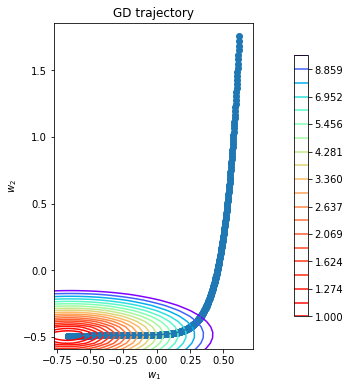

MSE: 0.8670644395649095
learning rate: 0.001


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


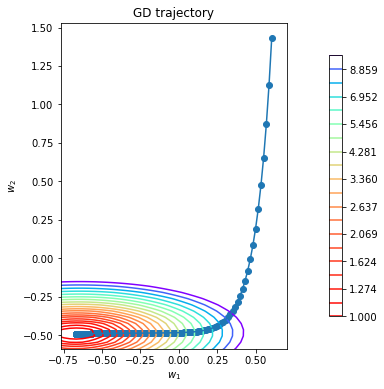

MSE: 0.8670644395649091
learning rate: 0.01


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


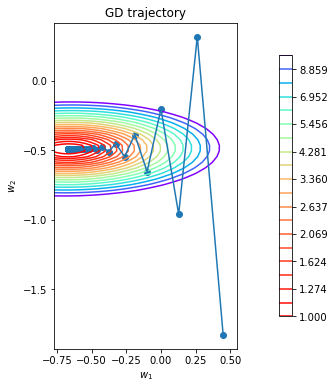

<ipython-input-5-71d051ed8551>:18: RuntimeWarning: invalid value encountered in subtract
  w_curr = w_curr - lr * grad_curr


MSE: nan
learning rate: 0.1


ValueError: Axis limits cannot be NaN or Inf

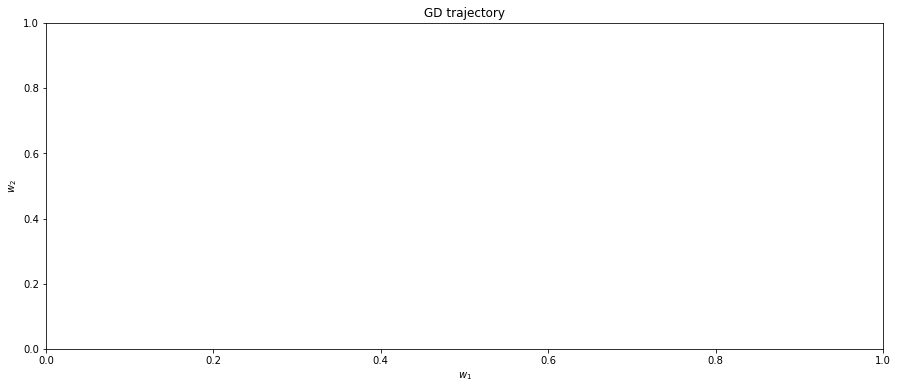

In [10]:
for lr in [0.00001, 0.0001, 0.001, 0.01, 0.1]:
    w_mem = gradient_descent(w_init, X, y, loss, lr)
    print('MSE: {}'.format(loss.calc_loss(X, y, w_mem[-1])))
    print('learning rate: {}'.format(lr))
    plot_gd(w_mem, X, y, loss)

Оптимальный lr = 0.01.

*Таким образом*, от длины шага зависит "гладкость" траектории. И если в случае lr = 0.01 мы всё же дошли до минимума, то при длине шага 0.1 мы, по-видимому, проскочили минимум и ушли настолько не туда, что MSE стала бесконечно большой. 

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [11]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    n_features = len(w_init)
    w_list = np.zeros((n_iterations, n_features))
    w_curr = w_init
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        grad = loss.calc_grad(X[batch_indices], y[batch_indices], w_curr)
        w_curr = w_curr - lr * grad
        w_list[i] = w_curr
        
    return w_list
 

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

In [12]:
import time

MSE: 1.473890801101031
--- 0.11693429946899414 seconds ---
learning rate: 0.0001
batch_size: 10


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


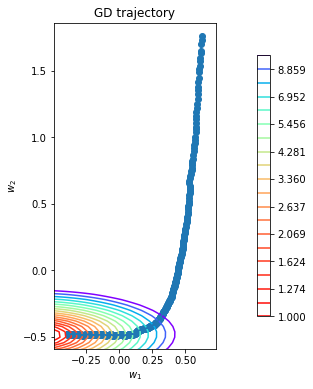

MSE: 1.4679579918461123
--- 0.10793709754943848 seconds ---
learning rate: 0.0001
batch_size: 50


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


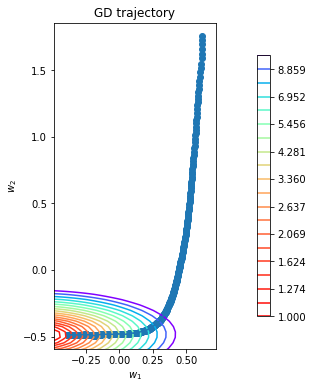

MSE: 1.4792550743786108
--- 0.09494757652282715 seconds ---
learning rate: 0.0001
batch_size: 100


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


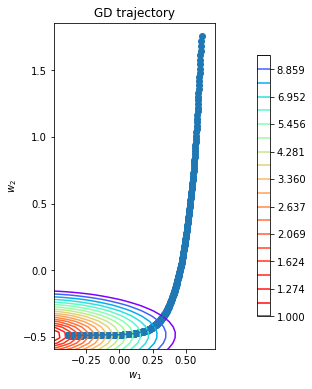

MSE: 1.4729372131512541
--- 0.09394526481628418 seconds ---
learning rate: 0.0001
batch_size: 150


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


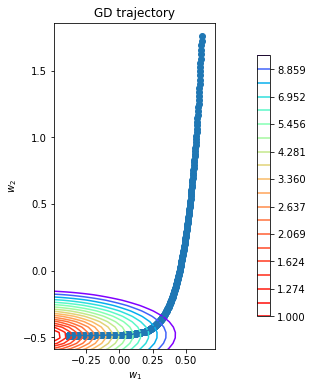

MSE: 0.8707345293447338
--- 0.11195111274719238 seconds ---
learning rate: 0.001
batch_size: 10


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


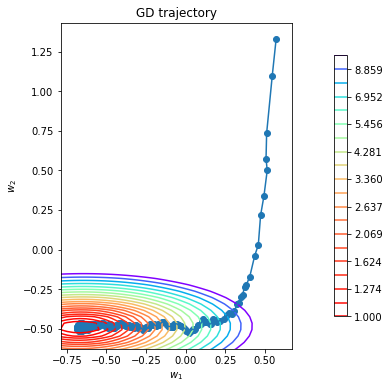

MSE: 0.867951460406278
--- 0.08794879913330078 seconds ---
learning rate: 0.001
batch_size: 50


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


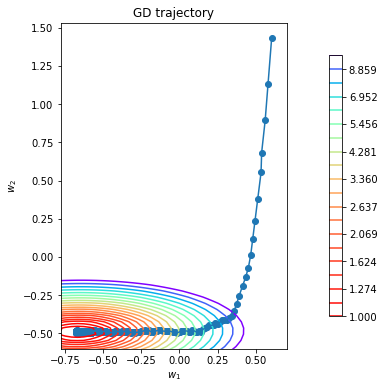

MSE: 0.8686968109057114
--- 0.08694958686828613 seconds ---
learning rate: 0.001
batch_size: 100


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


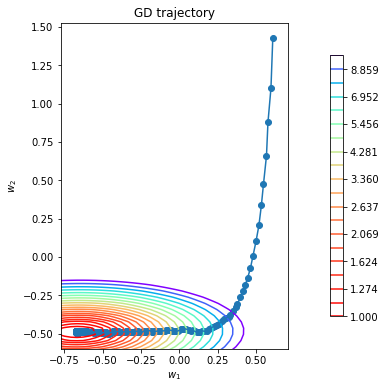

MSE: 0.8671598835708075
--- 0.12192964553833008 seconds ---
learning rate: 0.001
batch_size: 150


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


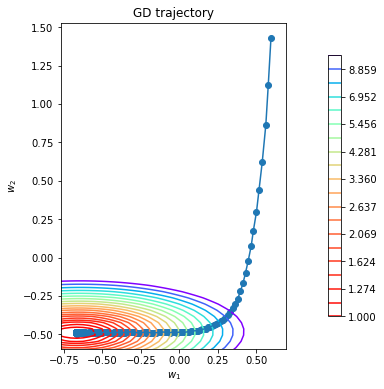

MSE: 0.9279356668551335
--- 0.08195328712463379 seconds ---
learning rate: 0.01
batch_size: 10


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


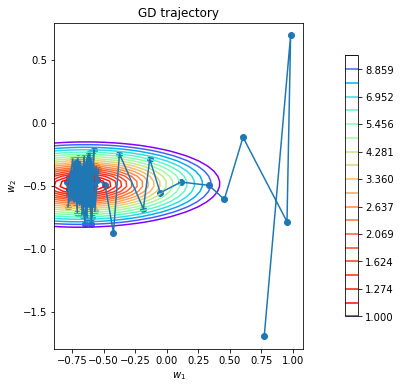

MSE: 0.8676942865777864
--- 0.09494447708129883 seconds ---
learning rate: 0.01
batch_size: 50


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


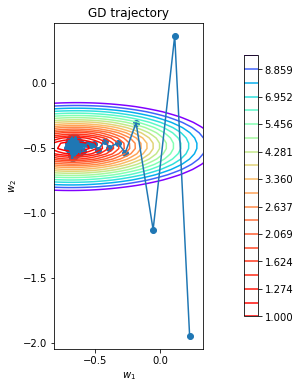

MSE: 0.9493525335006744
--- 0.09094786643981934 seconds ---
learning rate: 0.01
batch_size: 100


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


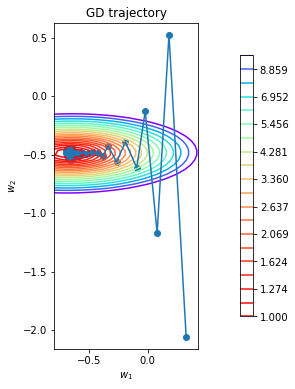

MSE: 0.8753558514020781
--- 0.184891939163208 seconds ---
learning rate: 0.01
batch_size: 150


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


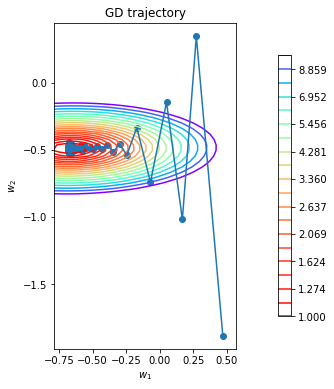

<ipython-input-11-730812c10e6b>:20: RuntimeWarning: invalid value encountered in subtract
  w_curr = w_curr - lr * grad


MSE: nan
--- 0.10494017601013184 seconds ---
learning rate: 0.1
batch_size: 10


ValueError: Axis limits cannot be NaN or Inf

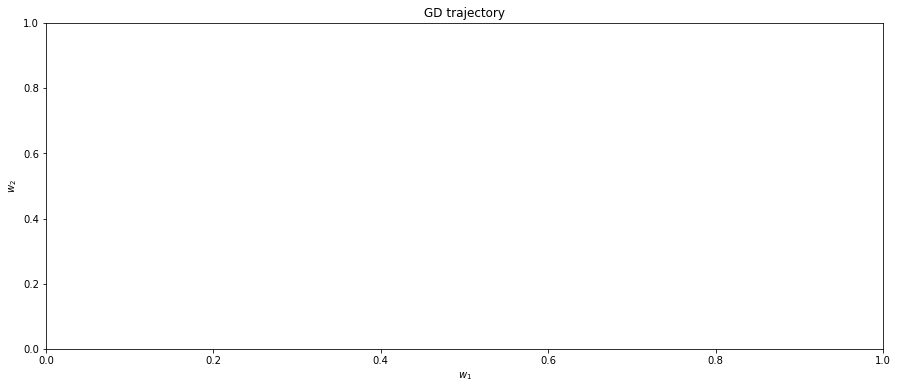

In [13]:
for lr in [0.0001, 0.001, 0.01, 0.1]:
    for batch_size in [10, 50, 100, 150]:
        start_time = time.time()
        w_mem = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size)
        print('MSE: {}'.format(loss.calc_loss(X, y, w_mem[-1])))
        print('--- %s seconds ---' % (time.time() - start_time))
        print('learning rate: {}'.format(lr))
        print('batch_size: {}'.format(batch_size))      
        plot_gd(w_mem, X, y, loss)

**Вывод по задаче:** Стохастический отличается тем, что градиент на каждом шаге вычисляется не по всем объектам, а по срезу заданного размера
1) Очевидно, batch влияет на время работы программы - чем меньше размер подвыборки, тем быстрее считаем
2) Чем больше batch_size, тем точнее результат. 
3) На больших lr (=0.1, 0.01), независимо от величины batch, веса изменяются слишком резко и велик шанс проскочить минимумы
4) С другой стороны, MSE при малых lr получилось несколько меньше, чем в случаях с большими lr. Я могу объяснить это тем, что не хватило итераций, чтобы дойти до минимума.
Таким образом, нужно искать компромисс между малыми lr и разумными batch_size. В нашем случае, учитывая MSE и время, оптимальные параметры:
`lr=0.001 batch_size={10, 50, 100, 150}` и `lr=0.01 batch_size=150`

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [14]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    n_features = len(w_init)
    w_list = np.zeros((n_iterations, n_features))
    w_curr = w_init
    
    for i in range(n_iterations):
        step_size = lr * ((1./(1 + i)) ** p)
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        grad = loss.calc_grad(X[batch_indices], y[batch_indices], w_curr)
        w_curr = w_curr - step_size * grad
        w_list[i] = w_curr
        
    return w_list


**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

MSE: 1.3872118771426123
--- 49740.958109378815 seconds ---
pow param: 0.01


<ipython-input-26-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


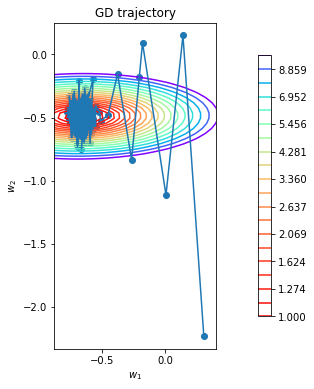

MSE: 0.8789799454512586
--- 49742.73311305046 seconds ---
pow param: 0.1


<ipython-input-26-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


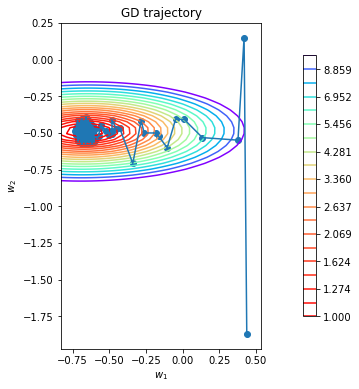

MSE: 0.8692859236473033
--- 49744.76193833351 seconds ---
pow param: 0.3


<ipython-input-26-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


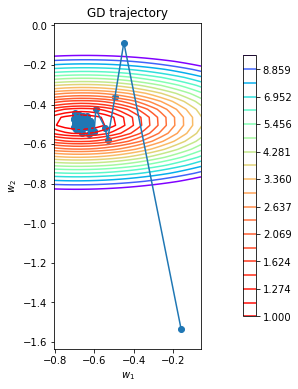

MSE: 0.8683821637671277
--- 49746.5289273262 seconds ---
pow param: 0.5


<ipython-input-26-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


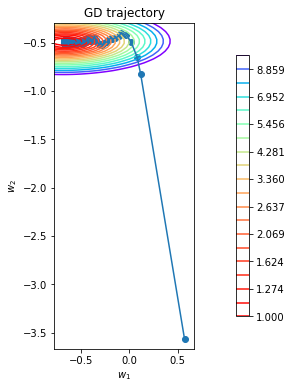

MSE: 0.9778586720380926
--- 49748.297912597656 seconds ---
pow param: 0.8


<ipython-input-26-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


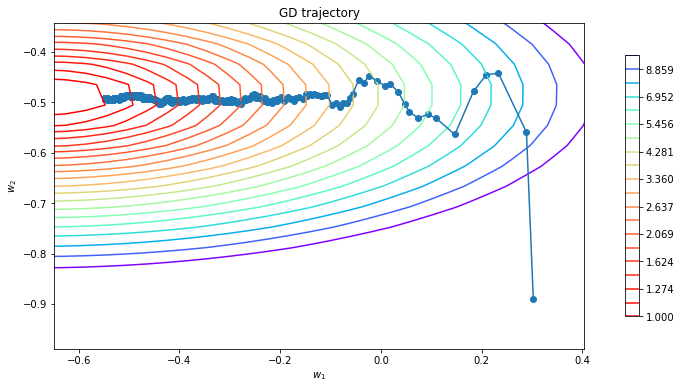

MSE: 3.5684215092205527
--- 49750.16085076332 seconds ---
pow param: 1


<ipython-input-26-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


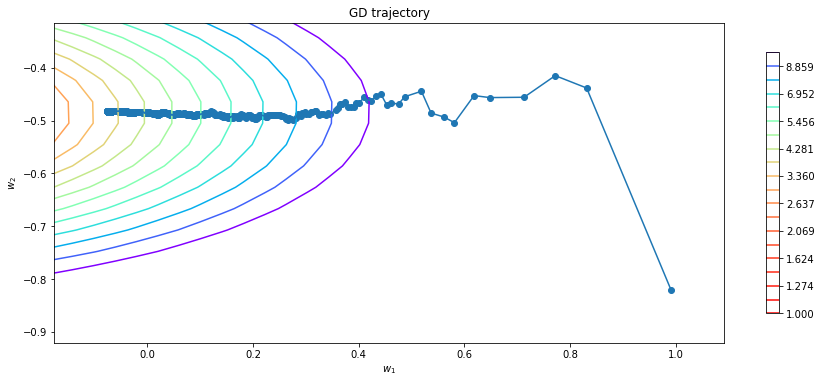

MSE: 39.6862123048019
--- 49751.9159450531 seconds ---
pow param: 2


<ipython-input-26-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


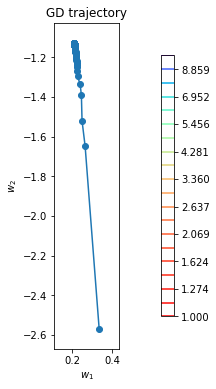

In [68]:
for p in [0.01, 0.1, 0.3, 0.5, 0.8, 1, 2]:
    w_mem = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p)
    print('MSE: {}'.format(loss.calc_loss(X, y, w_mem[-1])))
    print('--- %s seconds ---' % (time.time() - start_time))
    print('pow param: {}'.format(p))    
    plot_gd(w_mem, X, y, loss)

**Вывод по задаче:** 
1) При маленьких р длина шага на каждой итерации уменьшается не сильно, и мы видим по первым двум картинкам, что около минимума шаги всё ещё довольно большие. Так, можно проскочить минимум, и судя по MSE, мы в какой-то степени сделали это.
2) С другой стороны, при слишком больших p длина шага уменьшается слишком быстро, и может не хватить итераций для достижения минимума. Так, при p = 1 и p = 2 MSE оказалась наибольшей из полученных.
Таким образом, оптимальное `p = 0.5`.


**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

In [69]:
import matplotlib.pyplot as plt

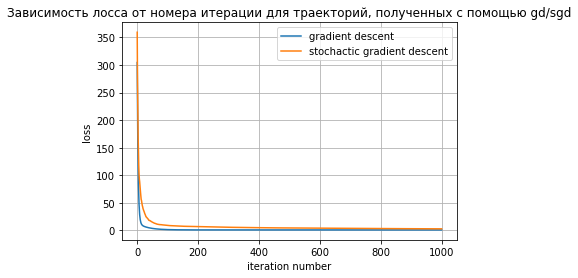

In [94]:
n_iterations = 1000
iteration = np.arange(n_iterations)
w_gd = gradient_descent(w_init, X, y, loss, lr=0.001, n_iterations=1000)
w_sgd = stochastic_gradient_descent(w_init, X, y, loss, lr=0.001, batch_size=10, p=0.5, n_iterations=1000)
loss_gd = [loss.calc_loss(X, y, w_gd[i]) for i in range(n_iterations)]
loss_sgd = [loss.calc_loss(X, y, w_sgd[i]) for i in range(n_iterations)]

plt.plot(iteration, loss_gd, '-', label='gradient descent')
plt.plot(iteration, loss_sgd, '-', label='stochactic gradient descent')
plt.xlabel("iteration number")
plt.ylabel("loss")

plt.title('Зависимость лосса от номера итерации для траекторий, полученных с помощью gd/sgd')
plt.legend()
plt.grid()
plt.show()

**Вывод по задаче:** На данном графике не видно преимущества SGD (GD даёт меньшую ошибку на более ранней итерации). Однако мы помним, что одна итерация SGD в разы быстрее итерации GD, поскольку каждый раз просматривается не вся выборка объектов-признаков, а какая-то ее часть. Поэтому, несмотря на то, что примерно до 600ой итерации GD круче уменьшает ошибку, SGD делает это быстрее, + к концу обе ошибки стремятся к 0 примерно с одинаковой скоростью итераций. Таким образом, SGD быстрее и даёт примерно такое же качество, как обычный GD.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [270]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.01) -> None:
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        # -- YOUR CODE HERE --
        n_features = X.shape[1]
        w_init = np.random.normal(size=(n_features, ))
        self.w = gradient_descent(w_init, X, y, self.loss, self.lr, n_iterations=10000)[-1]
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        # -- YOUR CODE HERE --
        return X.dot(self.w)
    

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [271]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [130]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None, 
    na_values=["?"],
    index_col=0
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [131]:
X_raw.tail()

0     1      2       3      4     5      6    7      8      9   ...   16  \
196  -1  95.0  volvo     gas    std  four  sedan  rwd  front  109.1  ...  141   
197  -1  95.0  volvo     gas  turbo  four  sedan  rwd  front  109.1  ...  141   
198  -1  95.0  volvo     gas    std  four  sedan  rwd  front  109.1  ...  173   
199  -1  95.0  volvo  diesel  turbo  four  sedan  rwd  front  109.1  ...  145   
200  -1  95.0  volvo     gas  turbo  four  sedan  rwd  front  109.1  ...  141   

       17    18    19    20     21      22  23  24       25  
196  mpfi  3.78  3.15   9.5  114.0  5400.0  23  28  16845.0  
197  mpfi  3.78  3.15   8.7  160.0  5300.0  19  25  19045.0  
198  mpfi  3.58  2.87   8.8  134.0  5500.0  18  23  21485.0  
199   idi  3.01  3.40  23.0  106.0  4800.0  26  27  22470.0  
200  mpfi  3.78  3.15   9.5  114.0  5400.0  19  25  22625.0  

[5 rows x 26 columns]

In [132]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

In [133]:
y.isna().sum()

0

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [197]:
from sklearn.model_selection import train_test_split

In [293]:
np.random.seed(12345)

X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2)

In [294]:
from sklearn.impute import SimpleImputer

In [295]:
cat_features_mask = (X_raw.dtypes == "object").values

# для вещественнозначных признаков заполним пропуски средними
X_train_real = X_train[X_raw.columns[~cat_features_mask]]
X_test_real = X_test[X_raw.columns[~cat_features_mask]]

mis_replacer = SimpleImputer(strategy="mean")
X_train_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_train_real), columns=X_train_real.columns)
X_test_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_test_real), columns=X_test_real.columns)

# для категориальных - пустыми строками
X_train_cat = X_train[X_raw.columns[cat_features_mask]].fillna("").reset_index(drop=True)
X_test_cat = X_test[X_raw.columns[cat_features_mask]].fillna("").reset_index(drop=True)

X_train_no_mis = pd.concat([X_train_no_mis_real, X_train_cat], axis=1)
X_test_no_mis = pd.concat([X_test_no_mis_real, X_test_cat], axis=1)

In [296]:
print(X_test_no_mis.isnull().any().any(), X_train_no_mis.isnull().any().any())

False False


In [297]:
from sklearn.preprocessing import OneHotEncoder

In [298]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

X_train_cat_encoded = pd.DataFrame(data=enc.fit_transform(X_train_no_mis[X_raw.columns[cat_features_mask]]))
X_test_cat_encoded = pd.DataFrame(data=enc.transform(X_test_no_mis[X_raw.columns[cat_features_mask]]))

X_train_encoded = pd.concat([X_train_no_mis[X_raw.columns[~cat_features_mask]], X_train_cat_encoded], axis=1)
X_test_encoded = pd.concat([X_test_no_mis[X_raw.columns[~cat_features_mask]], X_test_cat_encoded], axis=1)

In [299]:
from sklearn.preprocessing import StandardScaler

In [300]:
normalizer = StandardScaler()
X_train_norm_np = normalizer.fit_transform(X_train_encoded)
X_train = pd.DataFrame(data=X_train_norm_np)

X_test_norm_np = normalizer.fit_transform(X_test_encoded)
X_test = pd.DataFrame(data=X_test_norm_np)

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [301]:
linear_regression.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [302]:
from sklearn.metrics import mean_squared_error
print('MSE on train:', mean_squared_error(y_train, linear_regression.predict(X_train)))
print('MSE on test:', mean_squared_error(y_test, linear_regression.predict(X_test)))

MSE on train: 2259137.361825239
MSE on test: 5946415.499525217


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [277]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        l = len(y)
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return (1./l) * sum((X.dot(w) - y) ** 2) + self.coef * sum(w[:-1] ** 2)
        ##return (1./l) * (np.linalg.norm(X.dot(w) - y) ** 2) + self.coef * (np.linalg.norm(w[:-1]) ** 2)
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        l = len(y)
        grad = (2./l) * X.T.dot(X.dot(w) - y)
        w[-1] = 0
        reg = 2 * self.coef * w
        return grad + reg

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [278]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [303]:
for i in [0.005, 0.001, 0.01, 0.5]:
    MSEL2LossObj = MSEL2Loss(i)
    lr = LinearRegression(MSEL2LossObj)
    lr.fit(X_train, y_train)
    #testmse = mean_squared_error(y_test, lr.predict(X_test))
    print(f"coef = {i}")
    print('MSE L2 on train:', MSEL2LossObj.calc_loss(X_train, y_train, lr.w))
    print('MSE L2 on test:', MSEL2LossObj.calc_loss(X_test, y_test, lr.w))
    #print('MSE on train:', mean_squared_error(y_train, lr.predict(X_train)))
    #print('MSE on test:', testmse)
    print() 

coef = 0.005
MSE L2 on train: 173005047.42567813
MSE L2 on test: 162805620.6366619

coef = 0.001
MSE L2 on train: 172789513.58034605
MSE L2 on test: 164459739.2770048

coef = 0.01
MSE L2 on train: 173194408.08033776
MSE L2 on test: 161837816.36415362

coef = 0.5
MSE L2 on train: 178779813.10756087
MSE L2 on test: 165105611.63173607



Ошибка только увеличивается, зато ушло переобучение. Возможно, дело в данных

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [500]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return np.mean([((t < self.eps) * 0.5 * t ** 2) + (t >= self.eps) * self.eps * (t - 0.5 * self.eps) for t in abs(X.dot(w) - y)])
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        def func(z: float) -> float:
            if abs(z) < self.eps:
                return z
            return self.eps * np.sign(z)
        
        l = len(y)
        grad = 0
        for i in range(l):
            grad += X[i] * func(X[i].dot(w) - y[i])
        return (1./l) * grad

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [501]:
obj = HuberLoss(3000)

In [502]:
linear_regression = LinearRegression(obj)

In [503]:
linear_regression.fit(X_train, y_train)

In [504]:
print(obj.calc_loss(X_train, y_train, linear_regression.w))

914589.9659487389


In [505]:
print(obj.calc_loss(X_test, y_test, linear_regression.w))

2721556.2818021257


**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

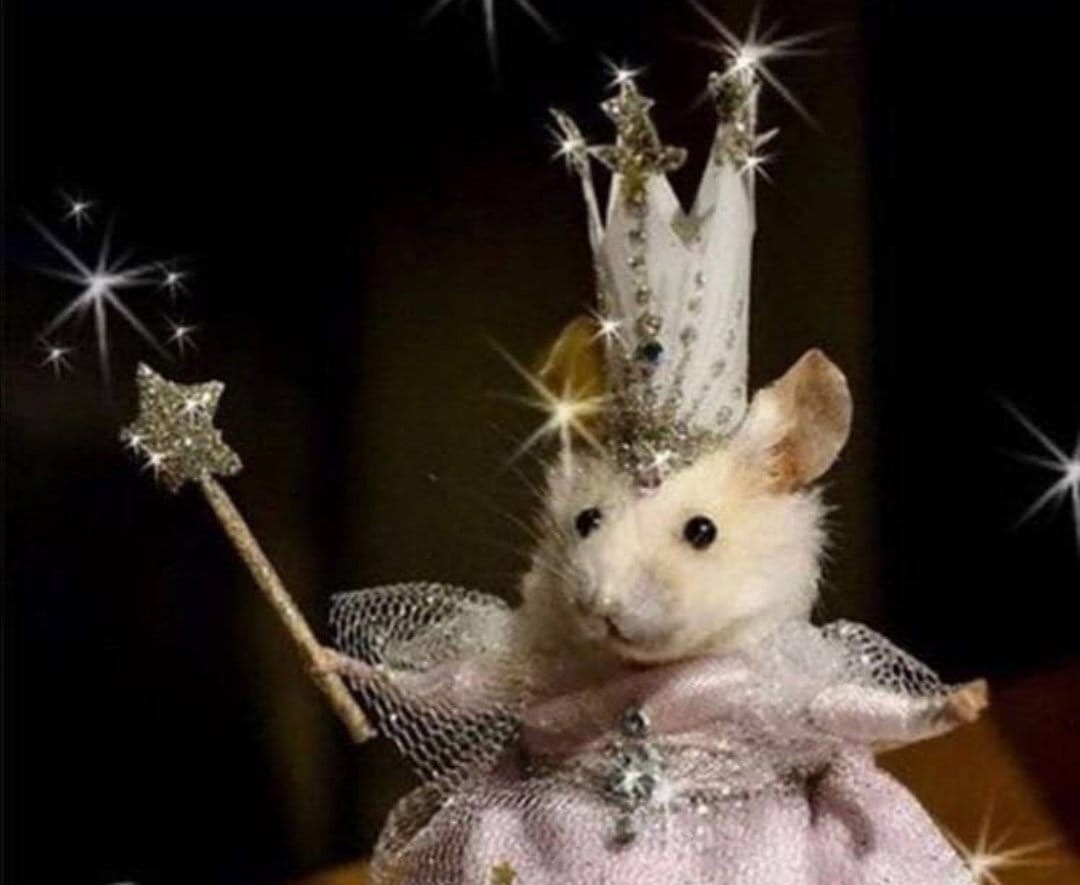

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [434]:
def simulated_annealing(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, t_min: int = 3, t_init: int = 100, n_freedom: int = 3) -> List[np.ndarray]:
    """
    Функция имитации отжига
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param t_min: int -- минимальное значение "температуры" - когда останавливаться
    :param t_init: int -- начальное значение "температуры"
    :param n_freedom: int -- количество степеней свободы в распределении Стьюдента
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    n_features = len(w_init)
    trac = list()
    old_w = w_init
    old_mse = loss.calc_loss(X, y, old_w)
    t_curr = t_init
    i = 0
    while t_curr > t_min:
        new_w = old_w + np.random.standard_t(3, size=n_features)
        new_mse = loss.calc_loss(X, y, new_w)
        mse_differ = new_mse - old_mse #разность значений ошибки в старой и новой точках
        if mse_differ <= 0:
            i += 1
            trac.append(new_w)
            old_w, old_mse = new_w, new_mse
        else:
            p = np.exp(- mse_differ/ t_curr)
            r = np.random.uniform(low=0, high=1)
            if r < p:
                i += 1
                trac.append(new_w)
                old_w, old_mse = new_w, new_mse
        t_curr = t_init / (1 + i)
    return trac
    

MSE: 3.583269152625683
--- 0.013987064361572266 seconds ---
max tempreture: 50
param of Student's distribution: 3


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


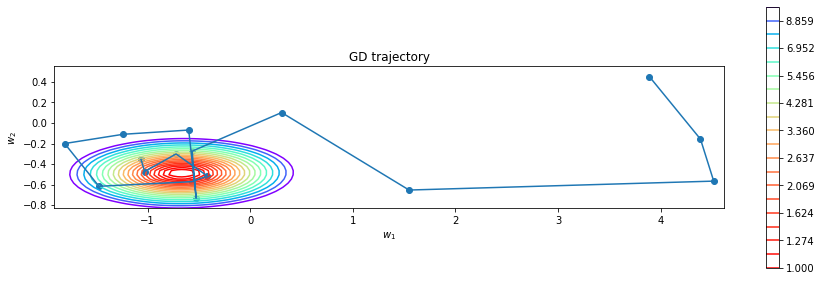

MSE: 0.9421311566780636
--- 0.028982877731323242 seconds ---
max tempreture: 50
param of Student's distribution: 5


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


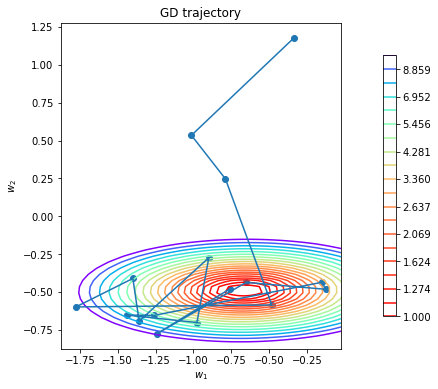

MSE: 10.227095429347276
--- 0.014012336730957031 seconds ---
max tempreture: 50
param of Student's distribution: 10


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


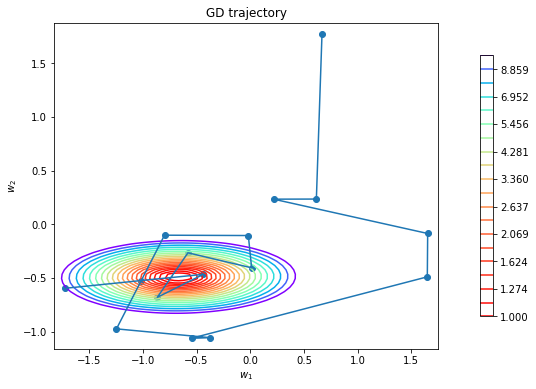

MSE: 4.698995483724807
--- 0.017991065979003906 seconds ---
max tempreture: 50
param of Student's distribution: 30


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


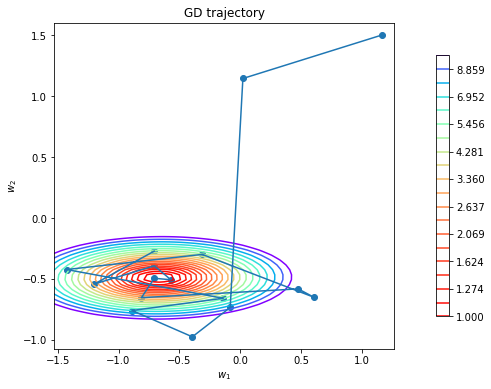

MSE: 6.257226831537927
--- 0.05097174644470215 seconds ---
max tempreture: 100
param of Student's distribution: 3


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


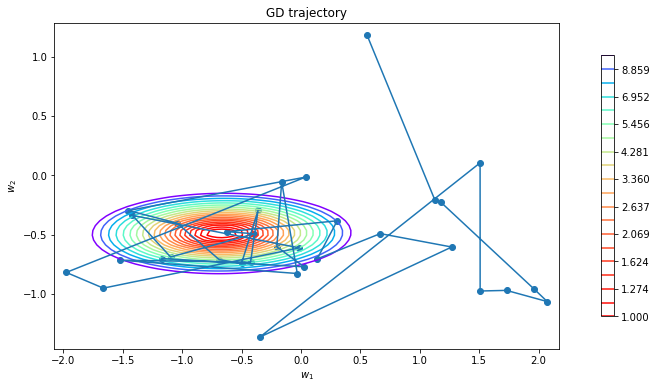

MSE: 1.5776031320765966
--- 0.032980918884277344 seconds ---
max tempreture: 100
param of Student's distribution: 5


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


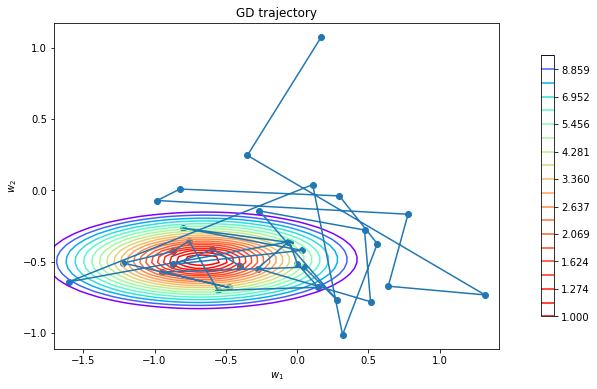

MSE: 7.709592435652902
--- 0.04495668411254883 seconds ---
max tempreture: 100
param of Student's distribution: 10


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


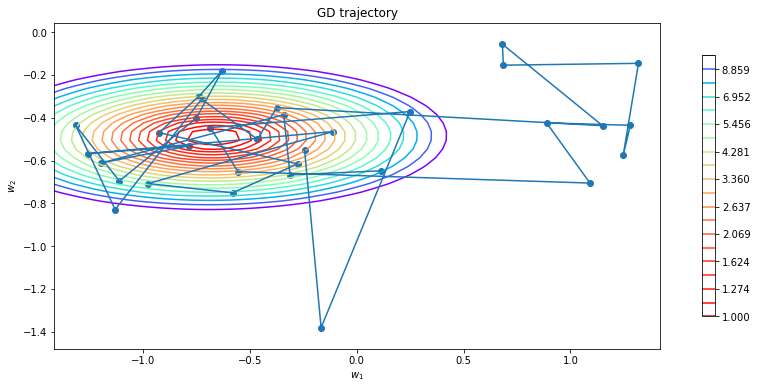

MSE: 2.957345996699586
--- 0.049971818923950195 seconds ---
max tempreture: 100
param of Student's distribution: 30


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


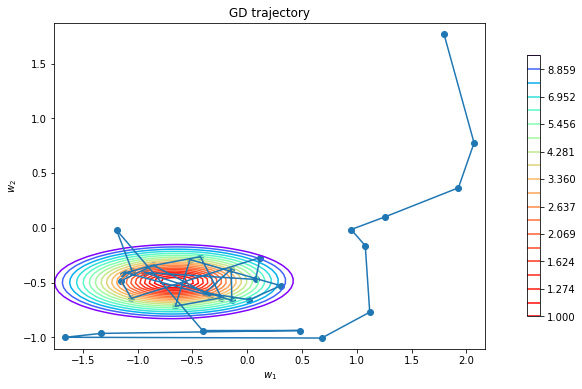

MSE: 1.162641061942473
--- 0.24086284637451172 seconds ---
max tempreture: 500
param of Student's distribution: 3


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


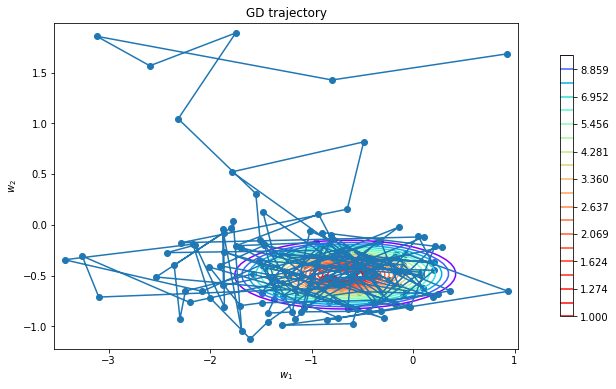

MSE: 8.713617918266143
--- 0.2788355350494385 seconds ---
max tempreture: 500
param of Student's distribution: 5


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


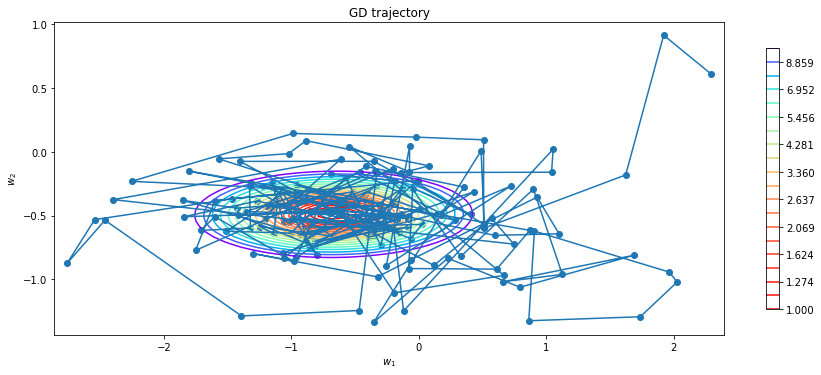

MSE: 4.078342755241751
--- 0.19388556480407715 seconds ---
max tempreture: 500
param of Student's distribution: 10


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


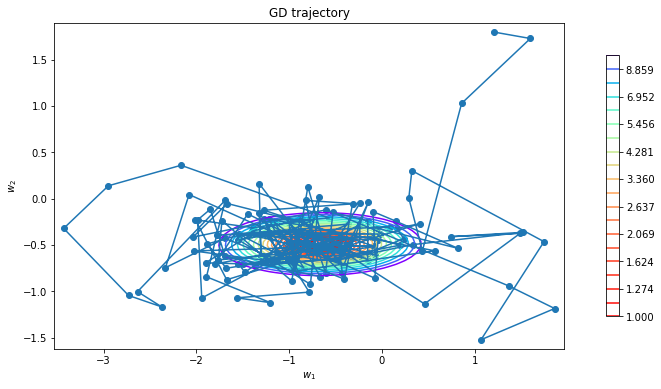

MSE: 2.8323096906754945
--- 0.16692233085632324 seconds ---
max tempreture: 500
param of Student's distribution: 30


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


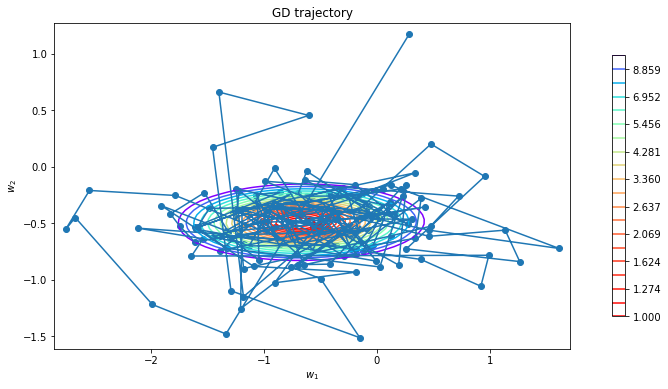

MSE: 6.6104562436319325
--- 0.3797643184661865 seconds ---
max tempreture: 1000
param of Student's distribution: 3


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


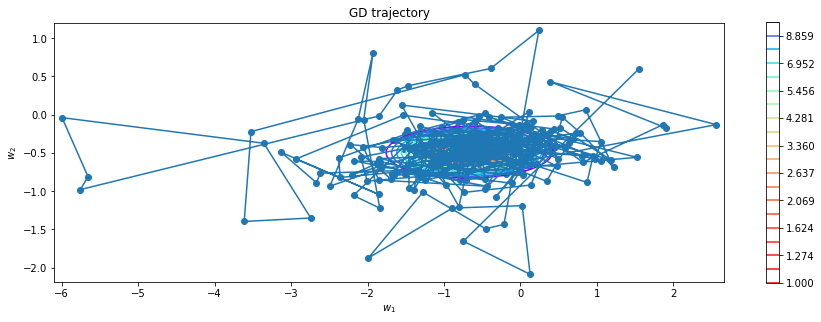

MSE: 8.400076773384598
--- 0.5426888465881348 seconds ---
max tempreture: 1000
param of Student's distribution: 5


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


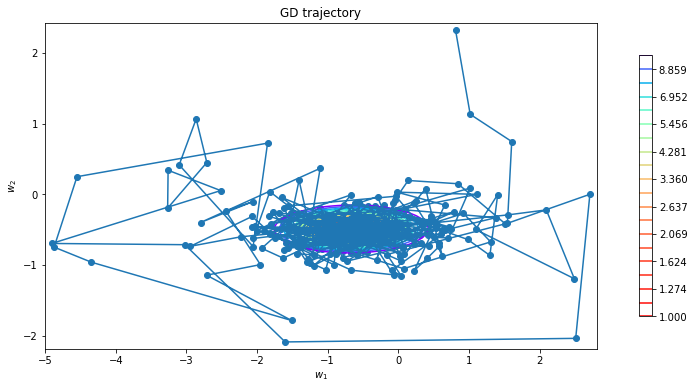

MSE: 2.2188275068905496
--- 0.2868537902832031 seconds ---
max tempreture: 1000
param of Student's distribution: 10


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


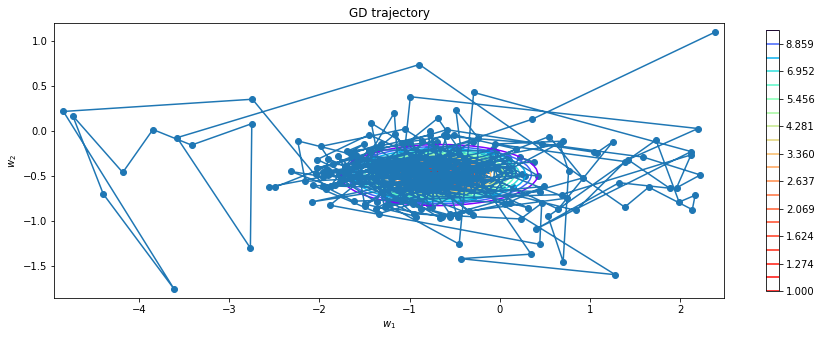

MSE: 10.763945188882127
--- 0.30982494354248047 seconds ---
max tempreture: 1000
param of Student's distribution: 30


<ipython-input-9-3b3de820193c>:31: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


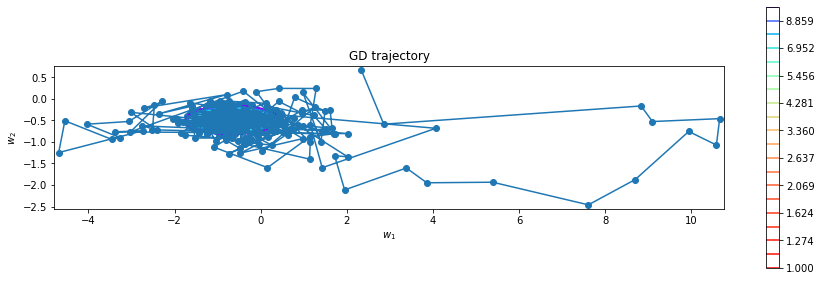

In [442]:
for t_init in [50, 100, 500, 1000]:
    for n_freedom in [3, 5, 10, 30]:
        start_time = time.time()
        w_mem = simulated_annealing(w_init, X, y, loss, 3, t_init, n_freedom)
        print('MSE: {}'.format(loss.calc_loss(X, y, w_mem[-1])))
        print('--- %s seconds ---' % (time.time() - start_time))
        print('max tempreture: {}'.format(t_init))
        print('param of Student\'s distribution: {}'.format(n_freedom))      
        plot_gd(w_mem, X, y, loss)

Оптимальные значения: max tempreture = 50, param of Student's distribution = 5. Получили, что при правильно подобранных парметрах этот алгоритм лучше градиентного спуска по времени и по значению mse.